In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import tensorflow as tf
# tensorflow moze optimalizovat proces grafu a distribuovat ho po sieti
# keras ma rychle a presne vysledky

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cleveland = pd.read_csv('heart.csv') # nacitanie suboru

#data = cleveland[~cleveland.isin(['?'])]
data = cleveland.dropna(axis = 0) # vymaz riadky kde aspon jeden element sa rovna 0
data = data.apply(pd.to_numeric) # transformuje data na cisla

from sklearn import model_selection
#rozdelenie na input(X) a output(y)
X = np.array(data.drop(['target'],axis = 1)) # konvertuje pandas na numpy bez stlpca target 
y = np.array(data['target']) 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2) # rozdeli data na trenovacie a testovacie v pome 80%:20%

from keras.utils.np_utils import to_categorical
print (y_train.shape)
print (y_train[:10])
Y_train = to_categorical(y_train, num_classes = None)# konvertuje na maticu tak ze bude mat rovnaky pocet stlpcov ako je tried,pocet riadkov sa nemeni
Y_test = to_categorical(y_test, num_classes = None)
print (Y_train.shape)
print (Y_train[:10])

(242,)
[1 0 0 1 1 1 1 1 0 0]
(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K


def create_model():

    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu')) 
    # vytvorí vrstvu so 16 neuronmy a 13 vstupmi, kernel_init definuje
    # náhodnu počiatocnú hodnotu váh
    # funkcia relu  generuje velmi dobré vysledky tak ako aj sigmoid
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation = (tf.nn.softmax)))
    # posledna vrstva je jeden neuron s aktivacnou funkciou softmax, ktora predstavuje zovseobecnenie sigmoidu.

    adam = Adam(lr=0.001)
    # keras realizuje rychlu variantu zostupu znamu ako Stochastic Gradient Descent (SGD),okrem nej ma aj rychlejsiu variantu Adam ktora obsahuje koncept
    # momentu(rýchlostný komponent), ktorá dovoluje rýchlejsiu konvergenciu(zblizenie) za cenu viac vypoctov. je presnejsi 
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # skompilovanie(zozbieranie) dat categorical_crossentropy je vhodna na predpoved viacero znaciek,pouzity optimajzer adam, accurancy predstavuje proportion
    # spravnych predpovedi s ohladom na ocakavane data (metrics sluzi na vyhodnocovanie modelu)
    return model

model = create_model()

In [4]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=1000, batch_size=10, verbose = 2)
# ucenie matice X:údaje ako numpy pole Y: menovky ako numpy pole
# validation_data:overovacie data 
# epoch: interval
# batch_size: Počet vzoriek na aktualizáciu gradientu.
# verbose: vypis epochov 0 = ziadne

Train on 242 samples, validate on 61 samples
Epoch 1/1000
 - 3s - loss: 0.6869 - acc: 0.5620 - val_loss: 0.6847 - val_acc: 0.5410
Epoch 2/1000
 - 0s - loss: 0.6811 - acc: 0.5785 - val_loss: 0.6760 - val_acc: 0.5246
Epoch 3/1000
 - 0s - loss: 0.6682 - acc: 0.6116 - val_loss: 0.6852 - val_acc: 0.4918
Epoch 4/1000
 - 0s - loss: 0.6613 - acc: 0.6446 - val_loss: 0.6763 - val_acc: 0.5082
Epoch 5/1000
 - 0s - loss: 0.6440 - acc: 0.6198 - val_loss: 0.6483 - val_acc: 0.6066
Epoch 6/1000
 - 0s - loss: 0.6488 - acc: 0.5950 - val_loss: 0.6831 - val_acc: 0.4918
Epoch 7/1000
 - 0s - loss: 0.6190 - acc: 0.6983 - val_loss: 0.6161 - val_acc: 0.6557
Epoch 8/1000
 - 0s - loss: 0.6075 - acc: 0.6818 - val_loss: 0.6492 - val_acc: 0.6230
Epoch 9/1000
 - 0s - loss: 0.5920 - acc: 0.6901 - val_loss: 0.5781 - val_acc: 0.7213
Epoch 10/1000
 - 0s - loss: 0.5714 - acc: 0.7066 - val_loss: 0.6465 - val_acc: 0.6393
Epoch 11/1000
 - 0s - loss: 0.5715 - acc: 0.7107 - val_loss: 0.5527 - val_acc: 0.7213
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.3774 - acc: 0.8512 - val_loss: 0.3386 - val_acc: 0.8525
Epoch 97/1000
 - 0s - loss: 0.3839 - acc: 0.8554 - val_loss: 0.3712 - val_acc: 0.8197
Epoch 98/1000
 - 0s - loss: 0.4117 - acc: 0.8430 - val_loss: 0.3347 - val_acc: 0.8525
Epoch 99/1000
 - 0s - loss: 0.3841 - acc: 0.8471 - val_loss: 0.3832 - val_acc: 0.7869
Epoch 100/1000
 - 0s - loss: 0.3992 - acc: 0.8347 - val_loss: 0.3638 - val_acc: 0.8197
Epoch 101/1000
 - 0s - loss: 0.4054 - acc: 0.8264 - val_loss: 0.3337 - val_acc: 0.8525
Epoch 102/1000
 - 0s - loss: 0.4008 - acc: 0.8264 - val_loss: 0.3340 - val_acc: 0.8525
Epoch 103/1000
 - 0s - loss: 0.3909 - acc: 0.8347 - val_loss: 0.3401 - val_acc: 0.8525
Epoch 104/1000
 - 0s - loss: 0.3823 - acc: 0.8512 - val_loss: 0.3341 - val_acc: 0.8525
Epoch 105/1000
 - 0s - loss: 0.3811 - acc: 0.8430 - val_loss: 0.3372 - val_acc: 0.8525
Epoch 106/1000
 - 0s - loss: 0.4127 - acc: 0.8223 - val_loss: 0.3353 - val_acc: 0.8689
Epoch 107/1000
 - 0s - loss: 0.4515 - acc: 0.77

Epoch 191/1000
 - 0s - loss: 0.3621 - acc: 0.8595 - val_loss: 0.3341 - val_acc: 0.8361
Epoch 192/1000
 - 0s - loss: 0.3995 - acc: 0.8223 - val_loss: 0.3289 - val_acc: 0.8689
Epoch 193/1000
 - 0s - loss: 0.3708 - acc: 0.8636 - val_loss: 0.3292 - val_acc: 0.8689
Epoch 194/1000
 - 0s - loss: 0.3678 - acc: 0.8471 - val_loss: 0.3320 - val_acc: 0.8197
Epoch 195/1000
 - 0s - loss: 0.3560 - acc: 0.8719 - val_loss: 0.3658 - val_acc: 0.8197
Epoch 196/1000
 - 0s - loss: 0.4166 - acc: 0.8182 - val_loss: 0.3335 - val_acc: 0.8361
Epoch 197/1000
 - 0s - loss: 0.3793 - acc: 0.8430 - val_loss: 0.3346 - val_acc: 0.8197
Epoch 198/1000
 - 0s - loss: 0.3752 - acc: 0.8636 - val_loss: 0.3698 - val_acc: 0.8197
Epoch 199/1000
 - 0s - loss: 0.3776 - acc: 0.8306 - val_loss: 0.3485 - val_acc: 0.8361
Epoch 200/1000
 - 0s - loss: 0.3623 - acc: 0.8595 - val_loss: 0.3370 - val_acc: 0.8033
Epoch 201/1000
 - 0s - loss: 0.3787 - acc: 0.8430 - val_loss: 0.3309 - val_acc: 0.8689
Epoch 202/1000
 - 0s - loss: 0.3854 - acc: 

 - 0s - loss: 0.3622 - acc: 0.8595 - val_loss: 0.3677 - val_acc: 0.8197
Epoch 286/1000
 - 0s - loss: 0.3638 - acc: 0.8471 - val_loss: 0.3438 - val_acc: 0.8361
Epoch 287/1000
 - 0s - loss: 0.3645 - acc: 0.8678 - val_loss: 0.3711 - val_acc: 0.8197
Epoch 288/1000
 - 0s - loss: 0.3922 - acc: 0.8182 - val_loss: 0.4036 - val_acc: 0.8033
Epoch 289/1000
 - 0s - loss: 0.4216 - acc: 0.8264 - val_loss: 0.4333 - val_acc: 0.8197
Epoch 290/1000
 - 0s - loss: 0.4362 - acc: 0.7893 - val_loss: 0.3667 - val_acc: 0.8361
Epoch 291/1000
 - 0s - loss: 0.3981 - acc: 0.8471 - val_loss: 0.3423 - val_acc: 0.8361
Epoch 292/1000
 - 0s - loss: 0.3632 - acc: 0.8554 - val_loss: 0.3500 - val_acc: 0.8361
Epoch 293/1000
 - 0s - loss: 0.3675 - acc: 0.8347 - val_loss: 0.3381 - val_acc: 0.8361
Epoch 294/1000
 - 0s - loss: 0.3604 - acc: 0.8595 - val_loss: 0.3328 - val_acc: 0.8197
Epoch 295/1000
 - 0s - loss: 0.3659 - acc: 0.8678 - val_loss: 0.3632 - val_acc: 0.8197
Epoch 296/1000
 - 0s - loss: 0.3701 - acc: 0.8471 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3666 - acc: 0.8471 - val_loss: 0.3384 - val_acc: 0.8361
Epoch 381/1000
 - 0s - loss: 0.3545 - acc: 0.8636 - val_loss: 0.3279 - val_acc: 0.8361
Epoch 382/1000
 - 0s - loss: 0.3678 - acc: 0.8430 - val_loss: 0.3248 - val_acc: 0.8361
Epoch 383/1000
 - 0s - loss: 0.3526 - acc: 0.8512 - val_loss: 0.3711 - val_acc: 0.8525
Epoch 384/1000
 - 0s - loss: 0.3688 - acc: 0.8595 - val_loss: 0.3468 - val_acc: 0.8361
Epoch 385/1000
 - 0s - loss: 0.3635 - acc: 0.8554 - val_loss: 0.3369 - val_acc: 0.8197
Epoch 386/1000
 - 0s - loss: 0.3634 - acc: 0.8554 - val_loss: 0.3632 - val_acc: 0.8361
Epoch 387/1000
 - 0s - loss: 0.3636 - acc: 0.8554 - val_loss: 0.3887 - val_acc: 0.8197
Epoch 388/1000
 - 0s - loss: 0.4057 - acc: 0.8182 - val_loss: 0.3391 - val_acc: 0.8361
Epoch 389/1000
 - 0s - loss: 0.3730 - acc: 0.8306 - val_loss: 0.3288 - val_acc: 0.8361
Epoch 390/1000
 - 0s - loss: 0.3565 - acc: 0.8595 - val_loss: 0.3300 - val_acc: 0.8197
Epoch 391/1000
 - 0s - loss: 0.3567 - acc: 

Epoch 475/1000
 - 0s - loss: 0.3536 - acc: 0.8595 - val_loss: 0.3464 - val_acc: 0.8361
Epoch 476/1000
 - 0s - loss: 0.3587 - acc: 0.8471 - val_loss: 0.3317 - val_acc: 0.8197
Epoch 477/1000
 - 0s - loss: 0.3453 - acc: 0.8554 - val_loss: 0.3650 - val_acc: 0.8525
Epoch 478/1000
 - 0s - loss: 0.3532 - acc: 0.8554 - val_loss: 0.3411 - val_acc: 0.8361
Epoch 479/1000
 - 0s - loss: 0.3661 - acc: 0.8430 - val_loss: 0.3384 - val_acc: 0.8361
Epoch 480/1000
 - 0s - loss: 0.3775 - acc: 0.8099 - val_loss: 0.3292 - val_acc: 0.8525
Epoch 481/1000
 - 0s - loss: 0.4183 - acc: 0.7975 - val_loss: 0.3292 - val_acc: 0.8525
Epoch 482/1000
 - 0s - loss: 0.3629 - acc: 0.8471 - val_loss: 0.3421 - val_acc: 0.8525
Epoch 483/1000
 - 0s - loss: 0.3792 - acc: 0.8554 - val_loss: 0.3311 - val_acc: 0.8361
Epoch 484/1000
 - 0s - loss: 0.3711 - acc: 0.8512 - val_loss: 0.3309 - val_acc: 0.8361
Epoch 485/1000
 - 0s - loss: 0.3638 - acc: 0.8595 - val_loss: 0.3311 - val_acc: 0.8361
Epoch 486/1000
 - 0s - loss: 0.3559 - acc: 

 - 0s - loss: 0.3492 - acc: 0.8636 - val_loss: 0.3436 - val_acc: 0.8525
Epoch 570/1000
 - 0s - loss: 0.3656 - acc: 0.8430 - val_loss: 0.3240 - val_acc: 0.8361
Epoch 571/1000
 - 0s - loss: 0.3476 - acc: 0.8636 - val_loss: 0.3482 - val_acc: 0.8689
Epoch 572/1000
 - 0s - loss: 0.3506 - acc: 0.8554 - val_loss: 0.3253 - val_acc: 0.8361
Epoch 573/1000
 - 0s - loss: 0.3492 - acc: 0.8636 - val_loss: 0.3318 - val_acc: 0.8197
Epoch 574/1000
 - 0s - loss: 0.3670 - acc: 0.8099 - val_loss: 0.3688 - val_acc: 0.8525
Epoch 575/1000
 - 0s - loss: 0.3796 - acc: 0.8223 - val_loss: 0.3881 - val_acc: 0.8361
Epoch 576/1000
 - 0s - loss: 0.3609 - acc: 0.8471 - val_loss: 0.3304 - val_acc: 0.8361
Epoch 577/1000
 - 0s - loss: 0.3529 - acc: 0.8554 - val_loss: 0.3314 - val_acc: 0.8361
Epoch 578/1000
 - 0s - loss: 0.3653 - acc: 0.8471 - val_loss: 0.3385 - val_acc: 0.8525
Epoch 579/1000
 - 0s - loss: 0.3760 - acc: 0.8388 - val_loss: 0.3521 - val_acc: 0.8197
Epoch 580/1000
 - 0s - loss: 0.3562 - acc: 0.8388 - val_lo

Epoch 664/1000
 - 0s - loss: 0.3690 - acc: 0.8512 - val_loss: 0.3484 - val_acc: 0.8361
Epoch 665/1000
 - 0s - loss: 0.3481 - acc: 0.8471 - val_loss: 0.3262 - val_acc: 0.8361
Epoch 666/1000
 - 0s - loss: 0.3520 - acc: 0.8595 - val_loss: 0.3267 - val_acc: 0.8197
Epoch 667/1000
 - 0s - loss: 0.3547 - acc: 0.8471 - val_loss: 0.3276 - val_acc: 0.8689
Epoch 668/1000
 - 0s - loss: 0.3882 - acc: 0.8430 - val_loss: 0.3312 - val_acc: 0.8197
Epoch 669/1000
 - 0s - loss: 0.3969 - acc: 0.8388 - val_loss: 0.3700 - val_acc: 0.8525
Epoch 670/1000
 - 0s - loss: 0.3977 - acc: 0.8512 - val_loss: 0.3762 - val_acc: 0.8689
Epoch 671/1000
 - 0s - loss: 0.3790 - acc: 0.8306 - val_loss: 0.3646 - val_acc: 0.8525
Epoch 672/1000
 - 0s - loss: 0.3596 - acc: 0.8430 - val_loss: 0.3228 - val_acc: 0.8197
Epoch 673/1000
 - 0s - loss: 0.3555 - acc: 0.8554 - val_loss: 0.3537 - val_acc: 0.8525
Epoch 674/1000
 - 0s - loss: 0.3502 - acc: 0.8512 - val_loss: 0.3296 - val_acc: 0.8361
Epoch 675/1000
 - 0s - loss: 0.3717 - acc: 

 - 0s - loss: 0.3544 - acc: 0.8471 - val_loss: 0.3447 - val_acc: 0.8689
Epoch 759/1000
 - 0s - loss: 0.3605 - acc: 0.8512 - val_loss: 0.3189 - val_acc: 0.8361
Epoch 760/1000
 - 0s - loss: 0.3569 - acc: 0.8430 - val_loss: 0.3381 - val_acc: 0.8525
Epoch 761/1000
 - 0s - loss: 0.3409 - acc: 0.8595 - val_loss: 0.3412 - val_acc: 0.8525
Epoch 762/1000
 - 0s - loss: 0.3366 - acc: 0.8678 - val_loss: 0.3496 - val_acc: 0.8525
Epoch 763/1000
 - 0s - loss: 0.3388 - acc: 0.8719 - val_loss: 0.3219 - val_acc: 0.8361
Epoch 764/1000
 - 0s - loss: 0.3434 - acc: 0.8554 - val_loss: 0.3127 - val_acc: 0.8361
Epoch 765/1000
 - 0s - loss: 0.3380 - acc: 0.8512 - val_loss: 0.3219 - val_acc: 0.8525
Epoch 766/1000
 - 0s - loss: 0.3315 - acc: 0.8678 - val_loss: 0.3046 - val_acc: 0.8525
Epoch 767/1000
 - 0s - loss: 0.3460 - acc: 0.8554 - val_loss: 0.3182 - val_acc: 0.8525
Epoch 768/1000
 - 0s - loss: 0.3570 - acc: 0.8554 - val_loss: 0.3223 - val_acc: 0.8525
Epoch 769/1000
 - 0s - loss: 0.3417 - acc: 0.8554 - val_lo

Epoch 853/1000
 - 0s - loss: 0.3388 - acc: 0.8554 - val_loss: 0.3326 - val_acc: 0.8689
Epoch 854/1000
 - 0s - loss: 0.3440 - acc: 0.8554 - val_loss: 0.3367 - val_acc: 0.8525
Epoch 855/1000
 - 0s - loss: 0.3371 - acc: 0.8595 - val_loss: 0.3676 - val_acc: 0.8689
Epoch 856/1000
 - 0s - loss: 0.3350 - acc: 0.8802 - val_loss: 0.3462 - val_acc: 0.8689
Epoch 857/1000
 - 0s - loss: 0.3257 - acc: 0.8678 - val_loss: 0.3387 - val_acc: 0.8689
Epoch 858/1000
 - 0s - loss: 0.3361 - acc: 0.8760 - val_loss: 0.3456 - val_acc: 0.8197
Epoch 859/1000
 - 0s - loss: 0.3420 - acc: 0.8595 - val_loss: 0.3334 - val_acc: 0.8361
Epoch 860/1000
 - 0s - loss: 0.3619 - acc: 0.8347 - val_loss: 0.3347 - val_acc: 0.8197
Epoch 861/1000
 - 0s - loss: 0.3449 - acc: 0.8636 - val_loss: 0.3409 - val_acc: 0.8033
Epoch 862/1000
 - 0s - loss: 0.3264 - acc: 0.8554 - val_loss: 0.3150 - val_acc: 0.8525
Epoch 863/1000
 - 0s - loss: 0.3324 - acc: 0.8636 - val_loss: 0.3325 - val_acc: 0.8525
Epoch 864/1000
 - 0s - loss: 0.3195 - acc: 

 - 0s - loss: 0.3428 - acc: 0.8554 - val_loss: 0.3522 - val_acc: 0.8197
Epoch 948/1000
 - 0s - loss: 0.3378 - acc: 0.8512 - val_loss: 0.3266 - val_acc: 0.8525
Epoch 949/1000
 - 0s - loss: 0.3057 - acc: 0.8760 - val_loss: 0.3597 - val_acc: 0.8361
Epoch 950/1000
 - 0s - loss: 0.3040 - acc: 0.8636 - val_loss: 0.3174 - val_acc: 0.8525
Epoch 951/1000
 - 0s - loss: 0.3178 - acc: 0.8636 - val_loss: 0.3317 - val_acc: 0.8361
Epoch 952/1000
 - 0s - loss: 0.2974 - acc: 0.8843 - val_loss: 0.3567 - val_acc: 0.8525
Epoch 953/1000
 - 0s - loss: 0.3017 - acc: 0.8843 - val_loss: 0.3346 - val_acc: 0.8361
Epoch 954/1000
 - 0s - loss: 0.2972 - acc: 0.8802 - val_loss: 0.3323 - val_acc: 0.8361
Epoch 955/1000
 - 0s - loss: 0.3125 - acc: 0.8636 - val_loss: 0.3171 - val_acc: 0.8525
Epoch 956/1000
 - 0s - loss: 0.3072 - acc: 0.8802 - val_loss: 0.3544 - val_acc: 0.8197
Epoch 957/1000
 - 0s - loss: 0.3079 - acc: 0.8719 - val_loss: 0.3220 - val_acc: 0.8689
Epoch 958/1000
 - 0s - loss: 0.2969 - acc: 0.8760 - val_lo

In [5]:
scores = model.evaluate(X_train, Y_train,verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 88.43%


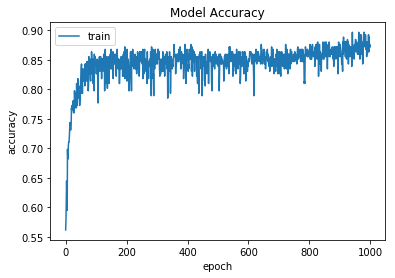

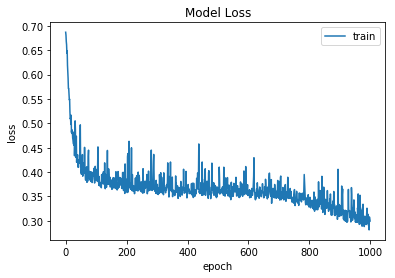

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model presnost
plt.plot(history.history['acc']) #sumarizacia history presnosti trenovacich dat 
plt.title('Model Accuracy')# nazov grafu
plt.ylabel('accuracy') # nazov y osi
plt.xlabel('epoch') # nazov x osi
plt.legend(['train', 'test']) # legenda pre trenovacia a testovacie data
plt.show()
# model chybovosti
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()